<a href="https://colab.research.google.com/github/ipavlopoulos/dfu/blob/main/DFU_OGDT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%%capture
!git clone https://github.com/ipavlopoulos/dfu.git
from dfu.lib import dfu, to_hist, pdf

### Artificial datasets
* Uniform, normal, bi/tri -polar distributions.
* Generate ratings (10-point scale).
* Create the PDF and then compute their DFU score.

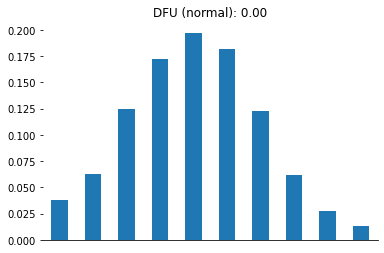

In [3]:
# the normal distribution (zero DFU expected)
ratings = np.random.normal(5, 2, size=10000)
ratings = [max(1, min(10,round(r))) for r in ratings]
ratings_pdf = pdf(ratings)
pd.Series(ratings_pdf).plot.bar(title=f"DFU (normal): {dfu(ratings_pdf):.2f}", xticks=[]);
sns.despine(left=True);

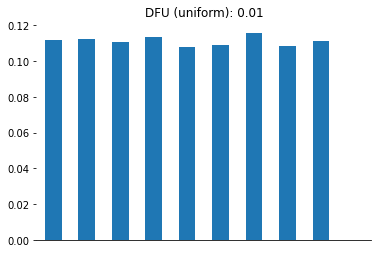

In [4]:
# uniform
ratings = np.random.randint(1, 10, size=10000)
ratings_pdf = pdf(ratings)
pd.Series(ratings_pdf).plot.bar(title=f"DFU (uniform): {dfu(ratings_pdf):.2f}", xticks=[]);
sns.despine(left=True);

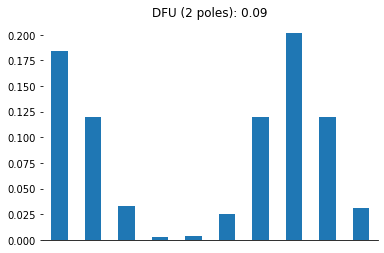

In [5]:
# bipolar
X1, X2 = [max(0,round(r)) for r in np.random.normal(1, 1, 5000)], [min(10,round(r)) for r in np.random.normal(8, 1, 5000)]
ratings = np.concatenate([X1, X2])
ratings_pdf = pdf(ratings)
pd.Series(ratings_pdf).plot.bar(title=f"DFU (2 poles): {dfu(ratings_pdf):.2f}", xticks=[]);
sns.despine(left=True);

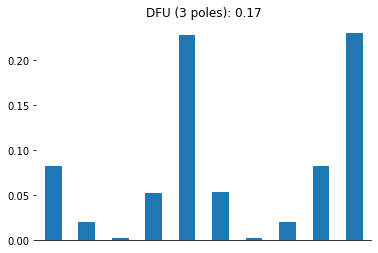

In [6]:
# tripolar
X1, X2 = [max(0,round(r)) for r in np.random.normal(0, 1, 3333)], [min(10,round(r)) for r in np.random.normal(10, 1, 3333)]
X3 = [round(r) for r in np.random.normal(5, .5, 3333)]
ratings = np.concatenate([X1, X2, X3])
ratings_pdf = pdf(ratings)
pd.Series(ratings_pdf).plot.bar(title=f"DFU (3 poles): {dfu(ratings_pdf):.2f}", xticks=[]);
sns.despine(left=True);

### DFU vs. Baselines on empirical ground truth data
* Download the data from [Kundenburg et al. (2021)](https://www.frontiersin.org/articles/10.3389/fpsyg.2021.738258/full#F2).

###### DFU

In [8]:
survey = pd.read_excel("Data_Sheet_2_ANewOpinionPolarizationIndexDevelopedbyIntegratingExpertJudgments.xlsx")
survey.sample(3)

,ppnr,RecordedDate,Study,consent,distributions_2,distributions_3,distributions_4,distributions_5,distributions_6,distributions_7,...,distributions_14,distributions_15,distributions_16,foundation_judgements,definition_polarization,DISTANCE,CLUSTERING,EXTREMITY,BALANCE,REMARK
50,51,2019-06-23 19:09:40,email,1,10,10,10,90,10,10,...,10,90,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,25,2019-06-06 18:54:10,email,1,15,38,6,80,30,30,...,20,95,25,"Variance, bimodality, balance",The degree to which a society or a party syste...,1.0,1.0,0.5,1.0,NaN
54,55,2019-07-03 15:31:55,email,1,20,20,5,40,20,20,...,20,90,15,Convergence on the mean of the distribution (i...,I typically study affective polarization: the ...,1.0,0.0,1.0,0.0,NaN


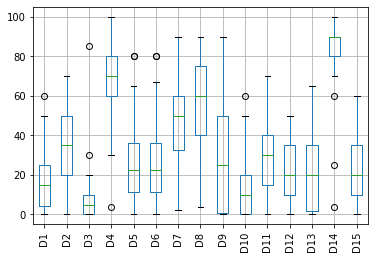

In [9]:
survey.iloc[:, 4:19].boxplot(rot=90);
plt.xticks(list(range(1,16)), [f"D{i}" for i in range(1,16)]);

* D15 is likely polarised while D4 is likely not.

In [10]:
d1=[12.0000,	 20.0000,	 40.0000,	 21.0000,	  7.0000]
d2=[40.0000,	 11.0000,	 28.0000,	 19.0000,	  2.0000]
d3=[3.1250,	 12.5000,	 68.7500,	 14.0625,	  1.5625] 
d4=[20.0000,	 25.0000,	  2.0000,	 28.0000,	 25.0000]
d5=[3.0303,	 11.1111,	 17.1717,	 24.2424,	 44.4444]
d6=[44.4444,	 25.2525,	 16.1616,	 10.1010,	  4.0404]
d7=[2.0000,	 31.0000,	  8.0000,	 29.0000,	 30.0000]
d8=[7.0000,	 38.0000,	  8.0000,	 37.0000,	 10.0000]
d9=[21.0000,	 19.0000,	 19.0000,	 20.0000,	 21.0000]
d10=[3.0303,	 25.2525,	 44.4444,	 24.2424,	  3.0303]
d11= [36.0000,	 20.0000,	 27.0000,	 11.0000,	  6.0000]
d12= [1.0000,	 30.0000,	 37.0000,	 21.0000,	 11.0000]
d13= [15.0000,	 21.0000,	 30.0000,	 20.0000,	 14.0000]
d14= [36.0000,	 10.0000,	  8.0000,	 11.0000,	 35.0000]
d15=[10.0000,	 21.0000,	 38.0000,	 29.0000,	  2.0000]
distributions=[d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15]

In [11]:
dfu_scores = [dfu(np.array(d)/100) for d in distributions]
dfu_scores_dict = dict(zip([f"d{i}" for i in range(1,16)], dfu_scores))
print(dfu_scores)
print(sorted(dfu_scores_dict, key=dfu_scores_dict.get, reverse=True))

[0, 0.17000000000000004, 0, 0.23, 0, 0, 0.20999999999999996, 0.29, 0.010000000000000009, 0, 0.07, 0, 0, 0.24, 0]
['d8', 'd14', 'd4', 'd7', 'd2', 'd11', 'd9', 'd1', 'd3', 'd5', 'd6', 'd10', 'd12', 'd13', 'd15']


In [12]:
gold = survey.iloc[:, 4:19].mean()
comp = pd.DataFrame({"HUMAN":gold, "DFU":dfu_scores})
comp.corr(method="spearman")

,HUMAN,DFU
HUMAN,1.000000,0.910333
DFU,0.910333,1.000000


In [13]:
comp.corr(method="pearson")

,HUMAN,DFU
HUMAN,1.000000,0.887976
DFU,0.887976,1.000000


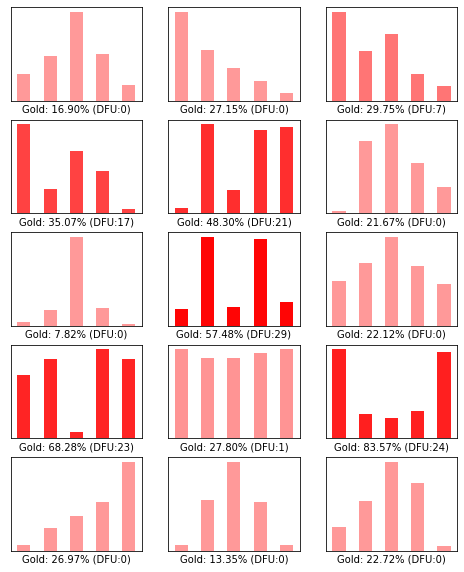

In [14]:
data = pd.DataFrame([(e, f"D{i+1}") for i,d in enumerate(distributions) for e in d], 
                    columns=["value","distribution"]);
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=3, nrows=5)
c = 0
for i in range(3):
  for j in range(5):
    d = data[data.distribution==f"D{c+1}"]
    dus = dfu(d.value.to_numpy())
    d.plot(ax=axes[j,i], kind='bar', xticks=[], yticks=[], color="r",
           legend=None, xlabel=f"Gold: {gold[c]:.2f}% (DFU:{dus:.0f})", figsize=(8,10), alpha = (2/5 + 3*(dus/30)/5))
    c+=1;

###### DIP
* [The dip test](https://github.com/BenjaminDoran/unidip).
* Not used in the study, but the code is provided here.

In [ ]:
## print the commands
#for i,d in enumerate(distributions):
#  print(f"print(dip.test(c{tuple(sorted(d))}))")
## load R
#%load_ext rpy2.ipython
## run
#%%R
#library(diptest)
#print(dip.test(c(7.0, 12.0, 20.0, 21.0, 40.0)))
#print(dip.test(c(2.0, 11.0, 19.0, 28.0, 40.0)))
#print(dip.test(c(1.5625, 3.125, 12.5, 14.0625, 68.75)))
#print(dip.test(c(2.0, 20.0, 25.0, 25.0, 28.0)))
#print(dip.test(c(3.0303, 11.1111, 17.1717, 24.2424, 44.4444)))
#print(dip.test(c(4.0404, 10.101, 16.1616, 25.2525, 44.4444)))
#print(dip.test(c(2.0, 8.0, 29.0, 30.0, 31.0)))
#print(dip.test(c(7.0, 8.0, 10.0, 37.0, 38.0)))
#print(dip.test(c(19.0, 19.0, 20.0, 21.0, 21.0)))
#print(dip.test(c(3.0303, 3.0303, 24.2424, 25.2525, 44.4444)))
#print(dip.test(c(6.0, 11.0, 20.0, 27.0, 36.0)))
#print(dip.test(c(1.0, 11.0, 21.0, 30.0, 37.0)))
#print(dip.test(c(14.0, 15.0, 20.0, 21.0, 30.0)))
#print(dip.test(c(8.0, 10.0, 11.0, 35.0, 36.0)))
#print(dip.test(c(2.0, 10.0, 21.0, 29.0, 38.0)))
#@ computed w/R
dip_scores_wr = [0.12308, 0.1, 0.17143, 0.1, 0.1, 0.1, 0.15556, 0.19286, 0.2, 0.19091, 0.1125, 0.1, 0.16667, 0.192, 0.11579]
pd.DataFrame({"human":gold, "dip":dip_scores_wr}).corr()

,human,dip
human,1.00000,0.14748
dip,0.14748,1.00000


In [ ]:
pd.DataFrame({"human":gold, "dip":dip_scores_wr}).corr("spearman")

,human,dip
human,1.000000,0.010911
dip,0.010911,1.000000


In [ ]:
!pip install unidip
import unidip.dip as dip
dip_scores = [dip.diptst(np.msort(d)) for d in distributions]
pd.DataFrame({"human":gold, "dip":[d[2][0] for d in dip_scores]}).corr()

,human,dip
human,1.000000,-0.397273
dip,-0.397273,1.000000


In [ ]:
pd.DataFrame({"human":gold, "dip":[d[2][0] for d in dip_scores]}).corr("spearman")

,human,dip
human,1.000000,-0.441172
dip,-0.441172,1.000000


###### Standard deviation (normalised)

In [ ]:
# Baselines
from sklearn.metrics import *
def nstd(dists, empirical=False): 
  # normalised stds, as described in https://www.frontiersin.org/articles/10.3389/fpsyg.2021.738258/full
  stds = [np.std(d) for d in dists]
  norm = 2 if not empirical else max(stds)
  return [s/norm for s in stds]

std_baseline = nstd(distributions)
#print ("MSE (baseline):", mean_absolute_error(gold, baseline))
#print ("MAE (baseline):", mean_squared_error(gold, baseline, squared=False))
pd.DataFrame({"nstd":std_baseline, "gold":gold}).corr()

,nstd,gold
nstd,1.000000,-0.192318
gold,-0.192318,1.000000


In [ ]:
pd.DataFrame({"nstd":std_baseline, "gold":gold}).corr("spearman")

,nstd,gold
nstd,1.000000,-0.314286
gold,-0.314286,1.000000


###### Kurtosis

In [ ]:
from scipy.stats import kurtosis
baseline = [kurtosis(d) for d in distributions]
pd.DataFrame({"nstd":baseline, "gold":gold}).corr()

,nstd,gold
nstd,1.000000,-0.349529
gold,-0.349529,1.000000


In [ ]:
pd.DataFrame({"nstd":baseline, "gold":gold}).corr("spearman")

,nstd,gold
nstd,1.000000,-0.478571
gold,-0.478571,1.000000


###### Variance

In [ ]:
baseline = [np.var(d) for d in distributions]
pd.DataFrame({"nstd":baseline, "gold":gold}).corr()

,nstd,gold
nstd,1.000000,-0.304212
gold,-0.304212,1.000000


###### Leik 1966
* Leik suggested that a simple measure of ordinal consensus for $m$ categories of an ordinal scale is D-1, where:
$$
D = \frac{2\sum_{i=1}^{m} d_i}{m-1}
$$
where $ d_i = F_i$ if $F_i<0.5$ else $1-F_i$

* Similarly, the interval consensus is:

$$
ic = 1 - (\frac{2\sigma}{m-1})^2 
$$

In [ ]:
def ordinal_dispersion(d, scale):
  fs = pdf(d, scale)
  d = [f if f>.5 else 1-f for f in fs]
  D = 2*sum(d)/(len(scale)-1)
  return D

leik_baseline = [ordinal_dispersion(d, SCALE10) for d in distributions]
pd.DataFrame({"nstd":leik_baseline, "gold":gold}).corr()

,nstd,gold
nstd,1.000000,-0.621258
gold,-0.621258,1.000000


In [ ]:
pd.DataFrame({"nstd":leik_baseline, "gold":gold}).corr("spearman")

,nstd,gold
nstd,1.000000,-0.585398
gold,-0.585398,1.000000


In [ ]:
baseline = [ordinal_dispersion(d, SCALE10)-1 for d in distributions]
pd.DataFrame({"nstd":baseline, "gold":gold}).corr()

,nstd,gold
nstd,1.000000,-0.621258
gold,-0.621258,1.000000


In [ ]:
pd.DataFrame({"nstd":baseline, "gold":gold}).corr("spearman")

,nstd,gold
nstd,1.000000,-0.585398
gold,-0.585398,1.000000


In [ ]:
# interval consensus
def interval_consensus(d, scale):
  d_pdf = pdf(d, scale)
  # w/o the subtraction from the unit, it makes more sense
  return 1 - np.square(2*np.std(d_pdf))/(len(scale)-1)

baseline = [interval_consensus(d, SCALE10) for d in distributions]
pd.DataFrame({"nstd":baseline, "gold":gold}).corr()

,nstd,gold
nstd,1.000000,-0.622245
gold,-0.622245,1.000000


In [ ]:
pd.DataFrame({"nstd":baseline, "gold":gold}).corr("spearman")

,nstd,gold
nstd,1.000000,-0.581484
gold,-0.581484,1.000000


###### Blair & Lacy 2000
* A measure of dispersion for discrete data, based on [this paper (pp. 255-256)](https://journals.sagepub.com/doi/pdf/10.1177/0049124100028003001?casa_token=32tiVHiP8lgAAAAA:s2p8vYctDF8Xce_GH2R1OR5hLkaDdOz3GiBTIFQ1jC5IYmkywtMNnfSQ68z5k5RP0vPh4GpmbcZ8).
* This index computes the cumulative relative frequency $F_i$ for each of the $i$ rating categories and then calculates the following:

$$
  d^2 = \sum_{i=1}^{k-1} (F_i - 0.5)^2
$$

In [ ]:
def d_square(d, scale):
  fs = cpdf(d, scale)
  return np.sum(np.square(np.array(fs) - .5))

d2_baseline = [d_square(d, SCALE10) for d in distributions]
pd.DataFrame({"nstd":d2_baseline, "gold":gold}).corr()

,nstd,gold
nstd,1.000000,-0.357024
gold,-0.357024,1.000000


In [ ]:
pd.DataFrame({"nstd":d2_baseline, "gold":gold}).corr("spearman")

,nstd,gold
nstd,1.000000,-0.378438
gold,-0.378438,1.000000


###### Apouey 2007
$$
P2(F) = K[(\frac{1}{2})^a - \frac{1}{C-1}\sum_{c=1}^{C-1} (F_c - 0.5)^a]
$$
where $k$ and $a$ are positive numbers.

In [ ]:
def a_index(d, scale=SCALE10, a=1, K=1):
  fs = cpdf(d, scale)
  p2 = np.power(0.5, a) - (1/(len(scale)-1)) * np.power(np.sum(fs[:-1]-0.5), a)
  return K * p2

baseline = [a_index(d, SCALE10) for d in distributions]
pd.DataFrame({"nstd":baseline, "gold":gold}).corr()

,nstd,gold
nstd,1.00000,-0.32558
gold,-0.32558,1.00000


In [ ]:
pd.DataFrame({"nstd":baseline, "gold":gold}).corr("spearman")

,nstd,gold
nstd,1.000000,-0.403593
gold,-0.403593,1.000000
